In [327]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.listdir('.')
# os.chdir('drive/My Drive/Colab_Test/Dataset/Classification')

['iris.csv', 'heart.csv', 'pima-indians-diabetes.csv', 'sonar.csv', 'iris']

In [328]:
dataset = pd.read_csv('sonar.csv')

In [329]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [330]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      208 non-null    float64
 1   V2      208 non-null    float64
 2   V3      208 non-null    float64
 3   V4      208 non-null    float64
 4   V5      208 non-null    float64
 5   V6      208 non-null    float64
 6   V7      208 non-null    float64
 7   V8      208 non-null    float64
 8   V9      208 non-null    float64
 9   V10     208 non-null    float64
 10  V11     208 non-null    float64
 11  V12     208 non-null    float64
 12  V13     208 non-null    float64
 13  V14     208 non-null    float64
 14  V15     208 non-null    float64
 15  V16     208 non-null    float64
 16  V17     208 non-null    float64
 17  V18     208 non-null    float64
 18  V19     208 non-null    float64
 19  V20     208 non-null    float64
 20  V21     208 non-null    float64
 21  V22     208 non-null    float64
 22  V2

In [331]:
dataset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,

In [332]:
dataset.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'Class'],
      dtype='object')

**Explioratory Data Analyst (EDA)**

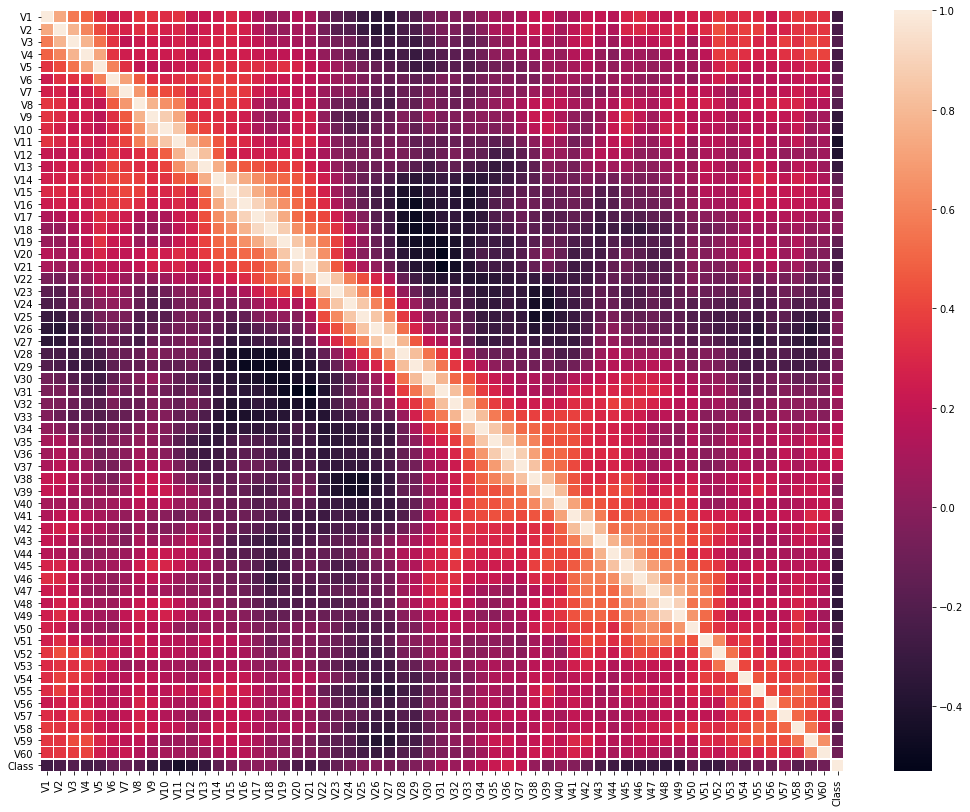

In [333]:
corr = dataset.corr()
plt.figure(figsize=(18,14))
sns.heatmap(corr, linewidths = .5)

**Machine Learning**

In [334]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

In [335]:
label = dataset['Class']
feature = dataset.drop(['Class'], axis = 1)

In [336]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

feature_scaled = scaler.fit_transform(feature.values)

In [337]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size = 0.20, random_state = 3)

**1. Logistic Regression**

In [338]:
log_reg = LogisticRegression()
log_reg.fit(feature_train, label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [339]:
log_reg = LogisticRegression()
log_reg.fit(feature_train, label_train)

predictions = log_reg.predict(feature_train)

print("Training Result Logistic Regression -> \n")
print(f"Accuracy from Logistic Regression is          : {round(log_reg.score(feature_train, label_train),2)}")
print(f"F1 Score from Logistic Regression is         : {f1_score(label_train, predictions, average='macro')}")
print(f"Precision Score from Logistic Regression is  : {precision_score(label_train, predictions, average='macro')}")
print(f"Recall Score from Logistic Regression is     : {recall_score(label_train, predictions, average='macro')}\n")


print("=========="*5)

predictions = log_reg.predict(feature_test)

print("Testing Result Logistic Regression -> \n")
print(f"Accuracy from Logistic Regression is          : {round(log_reg.score(feature_test, label_test),2)}")
print(f"F1 Score from Logistic Regression is         : {f1_score(label_test, predictions, average='macro')}")
print(f"Precision Score from Logistic Regression is  : {precision_score(label_test, predictions, average='macro')}")
print(f"Recall Score from Logistic Regression is     : {recall_score(label_test, predictions, average='macro')}")

Training Result Logistic Regression -> 

Accuracy from Logistic Regression is          : 0.86
F1 Score from Logistic Regression is         : 0.8603051480004391
Precision Score from Logistic Regression is  : 0.8630873471792606
Recall Score from Logistic Regression is     : 0.8591200466200466

Testing Result Logistic Regression -> 

Accuracy from Logistic Regression is          : 0.76
F1 Score from Logistic Regression is         : 0.7613636363636365
Precision Score from Logistic Regression is  : 0.7619047619047619
Recall Score from Logistic Regression is     : 0.7643020594965675


In [340]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        23
           1       0.71      0.79      0.75        19

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.77      0.76      0.76        42



**2. SVM**

In [341]:
svm_classifier = SVC(kernel = 'linear')

svm_classifier.fit(feature_train, label_train)
predictions = svm_classifier.predict(feature_train)

print("Training Result SVM -> \n")
print(f"Accuracy from SVM is          : {round(svm_classifier.score(feature_train, label_train),2)}")
print(f"F1 Score from SVM is         : {f1_score(label_train, predictions, average='macro')}")
print(f"Precision Score from SVM is  : {precision_score(label_train, predictions, average='macro')}")
print(f"Recall Score from SVM is     : {recall_score(label_train, predictions, average='macro')}\n")

print("=========="*5)


predictions = svm_classifier.predict(feature_test)

print("Testing Result SVM -> \n")
print(f"Accuracy from SVM is          : {round(svm_classifier.score(feature_test, label_test),2)}")
print(f"F1 Score from SVM is         : {f1_score(label_test, predictions, average='macro')}")
print(f"Precision Score from SVM is  : {precision_score(label_test, predictions, average='macro')}")
print(f"Recall Score from SVM is     : {recall_score(label_test, predictions, average='macro')}")

Training Result SVM -> 

Accuracy from SVM is          : 0.84
F1 Score from SVM is         : 0.8341658341658342
Precision Score from SVM is  : 0.8471439451637472
Recall Score from SVM is     : 0.8320221445221445

Testing Result SVM -> 

Accuracy from SVM is          : 0.69
F1 Score from SVM is         : 0.6860264519838988
Precision Score from SVM is  : 0.6875
Recall Score from SVM is     : 0.6853546910755148


In [342]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72        23
           1       0.67      0.63      0.65        19

    accuracy                           0.69        42
   macro avg       0.69      0.69      0.69        42
weighted avg       0.69      0.69      0.69        42



**3. Random Forest Classifier**

In [343]:
for i in range(50, 1001, 50) :
  random_forest = RandomForestClassifier(n_estimators= 50, bootstrap= True, max_features='sqrt')
  random_forest.fit(feature_train, label_train)
  predictions = random_forest.predict(feature_train)

  print(f"Training Result Random Forest Classifier, with n_estimators = {i} -> \n")
  print(f"Accuracy from Random Forest Classifier is          : {random_forest.score(feature_train, label_train)}")
  print(f"F1 Score from Random Forest Classifier is         : {f1_score(label_train, predictions, average='macro')}")
  print(f"Precision Score from Random Forest Classifier is  : {precision_score(label_train, predictions, average='macro')}")
  print(f"Recall Score from Random Forest Classifier is     : {recall_score(label_train, predictions, average='macro')}\n")



print("=========="*5)

for i in range(50, 1001, 50) :
  random_forest = RandomForestClassifier(n_estimators= i, bootstrap= True, max_features='sqrt')
  random_forest.fit(feature_train, label_train)
  predictions = random_forest.predict(feature_test)
  print(f"Testing Result Random Forest Classifier, with n_estimators = {i} -> \n")
  print(f"Accuracy from Random Forest Classifier is          : {random_forest.score(feature_test, label_test)}")
  print(f"F1 Score from Random Forest Classifier is         : {f1_score(label_test, predictions, average='macro')}")
  print(f"Precision Score from Random Forest Classifier is  : {precision_score(label_test, predictions, average='macro')}")
  print(f"Recall Score from Random Forest Classifier is     : {recall_score(label_test, predictions, average='macro')}\n")


Training Result Random Forest Classifier, with n_estimators = 50 -> 

Accuracy from Random Forest Classifier is          : 1.0
F1 Score from Random Forest Classifier is         : 1.0
Precision Score from Random Forest Classifier is  : 1.0
Recall Score from Random Forest Classifier is     : 1.0

Training Result Random Forest Classifier, with n_estimators = 100 -> 

Accuracy from Random Forest Classifier is          : 1.0
F1 Score from Random Forest Classifier is         : 1.0
Precision Score from Random Forest Classifier is  : 1.0
Recall Score from Random Forest Classifier is     : 1.0

Training Result Random Forest Classifier, with n_estimators = 150 -> 

Accuracy from Random Forest Classifier is          : 1.0
F1 Score from Random Forest Classifier is         : 1.0
Precision Score from Random Forest Classifier is  : 1.0
Recall Score from Random Forest Classifier is     : 1.0

Training Result Random Forest Classifier, with n_estimators = 200 -> 

Accuracy from Random Forest Classifier 

In [344]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       0.94      0.84      0.89        19

    accuracy                           0.90        42
   macro avg       0.91      0.90      0.90        42
weighted avg       0.91      0.90      0.90        42



**4. k-NN**

In [345]:
for i in range(1, 30, 2) :
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(feature_train, label_train)
  predictions = knn.predict(feature_train)

  print(f"Training Result k-NN, with n_neighbors = {i} -> \n")
  print(f"Accuracy from k-NN is           : {knn.score(feature_train, label_train)}")
  print(f"F1 Score from k-NN is          : {f1_score(label_train, predictions, average='macro')}")
  print(f"Precision Score from k-NN is   : {precision_score(label_train, predictions, average='macro')}")
  print(f"Recall Score from k-NN is      : {recall_score(label_train, predictions, average='macro')}\n")

print("=========="*5)
print(" ")
for i in range(1, 30, 2) :
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(feature_train, label_train)
  predictions = knn.predict(feature_test)

  print(f"Testing Result k-NN, with n_neighbors = {i} -> \n")
  print(f"Accuracy from k-NN is           : {knn.score(feature_test, label_test)}")
  print(f"F1 Score from k-NN is          : {f1_score(label_test, predictions, average='macro')}")
  print(f"Precision Score from k-NN is   : {precision_score(label_test, predictions, average='macro')}")
  print(f"Recall Score from k-NN is      : {recall_score(label_test, predictions, average='macro')}\n")

Training Result k-NN, with n_neighbors = 1 -> 

Accuracy from k-NN is           : 1.0
F1 Score from k-NN is          : 1.0
Precision Score from k-NN is   : 1.0
Recall Score from k-NN is      : 1.0

Training Result k-NN, with n_neighbors = 3 -> 

Accuracy from k-NN is           : 0.891566265060241
F1 Score from k-NN is          : 0.8907894736842105
Precision Score from k-NN is   : 0.8929200940070505
Recall Score from k-NN is      : 0.8897144522144522

Training Result k-NN, with n_neighbors = 5 -> 

Accuracy from k-NN is           : 0.8674698795180723
F1 Score from k-NN is          : 0.8662271062271062
Precision Score from k-NN is   : 0.8699763593380614
Recall Score from k-NN is      : 0.8648018648018647

Training Result k-NN, with n_neighbors = 7 -> 

Accuracy from k-NN is           : 0.8313253012048193
F1 Score from k-NN is          : 0.8293184488836662
Precision Score from k-NN is   : 0.8348214285714286
Recall Score from k-NN is      : 0.8277972027972028

Training Result k-NN, with n_

In [346]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77        23
           1       0.77      0.53      0.62        19

    accuracy                           0.71        42
   macro avg       0.73      0.70      0.70        42
weighted avg       0.73      0.71      0.70        42



**5. Naiv Bayes**

In [347]:
n_bayes = MultinomialNB()
n_bayes.fit(feature_train, label_train)

predictions = n_bayes.predict(feature_train)

print(f"Training Result Naiv Bayes -> \n")
print(f"Accuracy from Naiv Bayes is           : {round(n_bayes.score(feature_train, label_train),2)}")
print(f"F1 Score from Naiv Bayes is          : {f1_score(label_train, predictions, average='macro')}")
print(f"Precision Score from Naiv Bayes is   : {precision_score(label_train, predictions, average='macro')}")
print(f"Recall Score from Naiv Bayes is      : {recall_score(label_train, predictions, average='macro')}\n")

print("=========="*5)

predictions = n_bayes.predict(feature_test)

print(f"Testing Result Naiv Bayes -> \n")
print(f"Accuarcy from Naiv Bayes is           : {n_bayes.score(feature_test, label_test)}")
print(f"F1 Score from Naiv Bayes is          : {f1_score(label_test, predictions, average='macro')}")
print(f"Precision Score from Naiv Bayes is   : {precision_score(label_test, predictions, average='macro')}")
print(f"Recall Score from Naiv Bayes is      : {recall_score(label_test, predictions, average='macro')}\n")

Training Result Naiv Bayes -> 

Accuracy from Naiv Bayes is           : 0.75
F1 Score from Naiv Bayes is          : 0.7472800861460771
Precision Score from Naiv Bayes is   : 0.7609030667283094
Recall Score from Naiv Bayes is      : 0.7466491841491842

Testing Result Naiv Bayes -> 

Accuarcy from Naiv Bayes is           : 0.6666666666666666
F1 Score from Naiv Bayes is          : 0.6541176470588235
Precision Score from Naiv Bayes is   : 0.6666666666666666
Recall Score from Naiv Bayes is      : 0.6544622425629291



In [348]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72        23
           1       0.67      0.53      0.59        19

    accuracy                           0.67        42
   macro avg       0.67      0.65      0.65        42
weighted avg       0.67      0.67      0.66        42



**6. Linear Discriminant Analysis**

In [349]:
lda = LinearDiscriminantAnalysis() 
lda.fit(feature_train, label_train)
predictions = lda.predict(feature_train)

print(f"Training Result Linear Discriminant Analysis ->\n")
print(f"Accurcy from Linear Discriminant Analysis is           : {round(n_bayes.score(feature_train, label_train),2)}")
print(f"F1 Score from Linear Discriminant Analysis is          : {f1_score(label_train, predictions, average='macro')}")
print(f"Precision Score from Linear Discriminant Analysis is   : {precision_score(label_train, predictions, average='macro')}")
print(f"Recall Score from Linear Discriminant Analysis is      : {recall_score(label_train, predictions, average='macro')}\n")

print("=========="*5)

predictions = lda.predict(feature_test)

print(f"Testing Result Linear Discriminant Analysis ->\n")
print(f"Accuracy from Linear Discriminant Analysis is           : {round(n_bayes.score(feature_test, label_test),2)}")
print(f"F1 Score from Linear Discriminant Analysis is          : {f1_score(label_test, predictions, average='macro')}")
print(f"Precision Score from Linear Discriminant Analysis is   : {precision_score(label_test, predictions, average='macro')}")
print(f"Recall Score from Linear Discriminant Analysis is      : {recall_score(label_test, predictions, average='macro')}\n")

Training Result Linear Discriminant Analysis ->

Accurcy from Linear Discriminant Analysis is           : 0.75
F1 Score from Linear Discriminant Analysis is          : 0.9092400218698742
Precision Score from Linear Discriminant Analysis is   : 0.9096016343207354
Recall Score from Linear Discriminant Analysis is      : 0.9089452214452214

Testing Result Linear Discriminant Analysis ->

Accuracy from Linear Discriminant Analysis is           : 0.67
F1 Score from Linear Discriminant Analysis is          : 0.711670480549199
Precision Score from Linear Discriminant Analysis is   : 0.7116704805491991
Recall Score from Linear Discriminant Analysis is      : 0.7116704805491991



In [350]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        23
           1       0.68      0.68      0.68        19

    accuracy                           0.71        42
   macro avg       0.71      0.71      0.71        42
weighted avg       0.71      0.71      0.71        42



**7. Decision Tree Classifier**

In [351]:
for i in range(1, 31, 1) :
  t_classifier = tree.DecisionTreeClassifier(max_depth=i)
  t_classifier.fit(feature_train, label_train)
  predictions = t_classifier.predict(feature_train)


  print(f"Training Result Decision Tree Classifier, with max_depth : {i} ->\n")
  print(f"Accuracy from Decision Tree Classifier is           : {round(t_classifier.score(feature_train, label_train),2)}")
  print(f"F1 Score from Decision Tree Classifier is          : {f1_score(label_train, predictions, average='macro')}")
  print(f"Precision Score from Decision Tree Classifier is   : {precision_score(label_train, predictions, average='macro')}")
  print(f"Recall Score from Decision Tree Classifier is      : {recall_score(label_train, predictions, average='macro')}\n")

print("=========="*5)

for i in range(1, 31, 1) :
  t_classifier = tree.DecisionTreeClassifier(max_depth=i)
  t_classifier.fit(feature_train, label_train)
  predictions = t_classifier.predict(feature_test)
  
  print(f"Testing Result Decision Tree Classifier, with max_depth : {i} ->\n")
  print(f"Accuracy from Decision Tree Classifier is           : {round(t_classifier.score(feature_test, label_test),2)}")
  print(f"F1 Score from Decision Tree Classifier is          : {f1_score(label_test, predictions, average='macro')}")
  print(f"Precision Score from Decision Tree Classifier is   : {precision_score(label_test, predictions, average='macro')}")
  print(f"Recall Score from Decision Tree Classifier is      : {recall_score(label_test, predictions, average='macro')}\n")

Training Result Decision Tree Classifier, with max_depth : 1 ->

Accuracy from Decision Tree Classifier is           : 0.73
F1 Score from Decision Tree Classifier is          : 0.7177617410360071
Precision Score from Decision Tree Classifier is   : 0.7468468468468469
Recall Score from Decision Tree Classifier is      : 0.719551282051282

Training Result Decision Tree Classifier, with max_depth : 2 ->

Accuracy from Decision Tree Classifier is           : 0.83
F1 Score from Decision Tree Classifier is          : 0.8218818218818219
Precision Score from Decision Tree Classifier is   : 0.8345011424219345
Recall Score from Decision Tree Classifier is      : 0.8199300699300699

Training Result Decision Tree Classifier, with max_depth : 3 ->

Accuracy from Decision Tree Classifier is           : 0.88
F1 Score from Decision Tree Classifier is          : 0.8788851597840361
Precision Score from Decision Tree Classifier is   : 0.8796783625730994
Recall Score from Decision Tree Classifier is      

In [352]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        23
           1       0.63      0.63      0.63        19

    accuracy                           0.67        42
   macro avg       0.66      0.66      0.66        42
weighted avg       0.67      0.67      0.67        42



**8. XGBoost Classifier**

In [353]:
for i in range(10, 301, 50) :
  xg_class = xgb.XGBClassifier(objective='reg:linear', n_estimators=i)
  xg_class.fit(feature_train, label_train)
  predictions = xg_class.predict(feature_train)
 
  print(f"Training Result XGBoost Classifier, with max_depth : {i} ->\n")
  print(f"Accuracy from XGBoost Classifier is           : {round(xg_class.score(feature_train, label_train),2)}")
  print(f"F1 Score from XGBoost Classifier is          : {f1_score(label_train, predictions, average='macro')}")
  print(f"Precision Score from XGBoost Classifier is   : {precision_score(label_train, predictions, average='macro')}")
  print(f"Recall Score from XGBoost Classifier is      : {recall_score(label_train, predictions, average='macro')}\n")

print("========="*5)

for i in range(10, 301, 50) :
  xg_class = xgb.XGBClassifier(objective='reg:linear', n_estimators=i)
  xg_class.fit(feature_train, label_train)
  predictions = xg_class.predict(feature_test)

  print(f"Testing Result XGBoost Classifier, with max_depth : {i} ->\n")
  print(f"Accuracy from XGBoost Classifier is           : {round(t_classifier.score(feature_test, label_test),2)}")
  print(f"F1 Score from XGBoost Classifieris           : {f1_score(label_test, predictions, average='macro')}")
  print(f"Precision Score from XGBoost Classifier is   : {precision_score(label_test, predictions, average='macro')}")
  print(f"Recall Score from XGBoost Classifier is      : {recall_score(label_test, predictions, average='macro')}\n")

[08:12:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Result XGBoost Classifier, with max_depth : 10 ->

Accuracy from XGBoost Classifier is           : 0.98
F1 Score from XGBoost Classifier is          : 0.9818161901632161
Precision Score from XGBoost Classifier is   : 0.9835164835164836
Recall Score from XGBoost Classifier is      : 0.9807692307692308

[08:12:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Result XGBoost Classifier, with max_depth : 60 ->

Accuracy from XGBoost Classifier is           : 1.0
F1 Score from XGBoost Classifier is          : 1.0
Precision Score from XGBoost Classifier is   : 1.0
Recall Score from XGBoost Classifier is      : 1.0

[08:12:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Result XGBoost Classifier, with 

**9. Ridge Classifier**

In [354]:
r_class = RidgeClassifier()
r_class.fit(feature_train, label_train)

predictions = r_class.predict(feature_train)

print(f"Training Result Ridge Classifier ->\n")
print(f"Accuracy from Ridge Classifier is          : {round(xg_class.score(feature_train, label_train),2)}")
print(f"F1 Score from Ridge Classifier is          : {f1_score(label_train, predictions, average='macro')}")
print(f"Precision Score from Ridge Classifier is   : {precision_score(label_train, predictions, average='macro')}")
print(f"Recall Score from Ridge Classifier is      : {recall_score(label_train, predictions, average='macro')}\n")

predictions = r_class.predict(feature_test)

print(f"Testing Result Ridge Classifier ->\n")
print(f"Accuracy from Ridge Classifier is          : {round(xg_class.score(feature_test, label_test),2)}")
print(f"F1 Score from Ridge Classifier is          : {f1_score(label_test, predictions, average='macro')}")
print(f"Precision Score from Ridge Classifier is   : {precision_score(label_test, predictions, average='macro')}")
print(f"Recall Score from Ridge Classifier is      : {recall_score(label_test, predictions, average='macro')}\n")


Training Result Ridge Classifier ->

Accuracy from Ridge Classifier is          : 1.0
F1 Score from Ridge Classifier is          : 0.8969584109248913
Precision Score from Ridge Classifier is   : 0.8983882783882784
Recall Score from Ridge Classifier is      : 0.8961247086247086

Testing Result Ridge Classifier ->

Accuracy from Ridge Classifier is          : 0.83
F1 Score from Ridge Classifier is          : 0.6181818181818182
Precision Score from Ridge Classifier is   : 0.6329411764705883
Recall Score from Ridge Classifier is      : 0.6292906178489702



**10. GaussianNB**

In [355]:
gnb = GaussianNB()
gnb.fit(feature_train, label_train)
predictions = gnb.predict(feature_train)

print(f"Training Result GausianNB ->\n")
print(f"Accuracy from GausianNB is          : {round(xg_class.score(feature_train, label_train),2)}")
print(f"F1 Score from GausianNB is          : {f1_score(label_train, predictions, average='macro')}")
print(f"Precision Score from GausianNB is   : {precision_score(label_train, predictions, average='macro')}")
print(f"Recall Score from GausianNB is      : {recall_score(label_train, predictions, average='macro')}\n")

predictions = gnb.predict(feature_test)

print(f"Testing Result GausianNB ->\n")
print(f"Accuracy from GausianNB is          : {round(xg_class.score(feature_test, label_test),2)}")
print(f"F1 Score from GausianNB is          : {f1_score(label_test, predictions, average='macro')}")
print(f"Precision Score from GausianNB is   : {precision_score(label_test, predictions, average='macro')}")
print(f"Recall Score from GausianNB is      : {recall_score(label_test, predictions, average='macro')}\n")


Training Result GausianNB ->

Accuracy from GausianNB is          : 1.0
F1 Score from GausianNB is          : 0.7375252803824233
Precision Score from GausianNB is   : 0.7724536670362743
Recall Score from GausianNB is      : 0.7505827505827506

Testing Result GausianNB ->

Accuracy from GausianNB is          : 0.83
F1 Score from GausianNB is          : 0.6326530612244898
Precision Score from GausianNB is   : 0.7
Recall Score from GausianNB is      : 0.6647597254004577



Berdasarkan dataset Sonar tersebut, **kemungkinan keberhasilan dari data pengujian yang telah dilakukannya adalah sebesar 95%**. Angka tersebut didapatkan dengan melakukan pengujian akurasi dengan menggunakan algoritma Random Forest Classifier.

Persentase diatas didapatkan dengan n_estimator = 750